In [1]:
#scope of proj

#..develop deep learning models for the given dataset and problem definition
#..apply model tuning and optimization to improve the performance of deep learning models
#..evaluate deep learning models using appropriate metrics for efficiency and effectiveness
#..compare the different deep learning models on their performance with respect to the given dataset and problem definition

# classes - 4 (airplane, automobile, ship, truck)
# image size - 32 x 32
# train size - 2000 images per class, 8,000 in total in the train folder
# test size - 500 images per class, 2,000 in total in the test folder

#..develop TWO deep learning models (CNN and Transferred Learning) for the classification task with the given dataset
# with the sections -> data prep, CNN model, transfer learning model, summary and comparison

#..summary and comparison in 3 sections
# 1) Summary of CNN model development (<150 words): to describe your key considerations on design strategy, overfitting techniques, evaluation & optimization, etc
# 2) Summary of Transfer Learning model development (<150 words): to describe your key considerations on pre-trained model selection, tuning strategies, overfitting techniques, evaluation & optimization, etc.
# 3) Comparison of the 2 models (CNN and Transfer Learning) (<150 words): to compare and explain their results and performance, pros/cons, suitability for the given task, etc

# download and unzip folders

In [2]:
!pip install git+https://github.com/jfilter/split-folders.git

  Cloning https://github.com/jfilter/split-folders.git to c:\users\zzsle\appdata\local\temp\pip-req-build-vhsamkdu
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git 'C:\Users\ZzSle\AppData\Local\Temp\pip-req-build-vhsamkdu'


In [3]:
import zipfile
import os

# Path to the zip file
zip_file_path = 'testing folder/dataset_transport.zip'

# Directory where you want to extract the files
extracted_dir = 'testing folder/'

# Create the directory if it doesn't exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extracted_dir)

print("Files extracted successfully.")

Files extracted successfully.


# data preparation

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

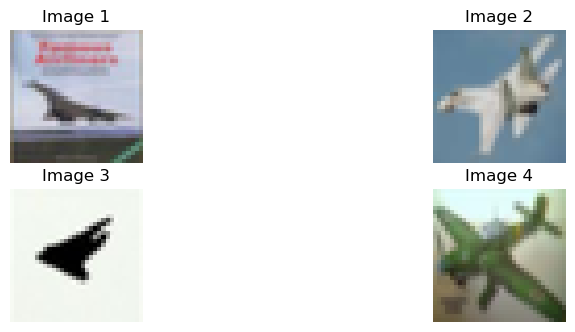

In [5]:
import os
import cv2

airplane = "testing folder/dataset_transport/test/airplane"
count = 0
plt.figure(figsize=(10, 10))

for filename in os.listdir(airplane):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        image_path = os.path.join(airplane, filename)
        image = cv2.imread(image_path)
        if image is not None:
            plt.subplot(5, 2, count + 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Image {count+1}")
            count += 1
            if count >= 4:
                break
    else:
        print(f"Skipping file: {filename}, not an image.")
plt.show()

In [6]:
#visualise the number of imgs in dataset, check if the dataset is skewed or not
def count_images_in_directory(directory):
    total_count = 0
    class_counts = {}
    
    # Iterate through each class folder in the directory
    for class_folder in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, class_folder)):
            class_count = len(os.listdir(os.path.join(directory, class_folder)))
            class_counts[class_folder] = class_count
            total_count += class_count
    
    return total_count, class_counts

# Define paths to test and train directories
path_test = "testing folder/dataset_transport/test"
path_train = "testing folder/dataset_transport/train"

# Count images in train and test directories
total_train_images, train_class_counts = count_images_in_directory(path_train)
total_test_images, test_class_counts = count_images_in_directory(path_test)

# Print the results
print("Train set:")
print("Total images:", total_train_images)
print("Images per class:", train_class_counts)
print()
print("Test set:")
print("Total images:", total_test_images)
print("Images per class:", test_class_counts)

Train set:
Total images: 8000
Images per class: {'airplane': 2000, 'automobile': 2000, 'ship': 2000, 'truck': 2000}

Test set:
Total images: 2000
Images per class: {'airplane': 500, 'automobile': 500, 'ship': 500, 'truck': 500}


the number of imgs per class is the same, data is not biased

In [7]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#split data so that there is a validation dataset
import splitfolders
path_test_split =  "testing folder/dataset_transport/splitt"#Enter Output Folder

splitfolders.ratio("testing folder/dataset_transport/train", output=path_test_split, seed=42, ratio=(0.75,0.25))

Copying files: 8000 files [00:45, 177.40 files/s]


In [9]:
# Define paths to test and train directories
path_train="testing folder/dataset_transport/splitt/train"
path_val="testing folder/dataset_transport/splitt/val"
path_test="testing folder/dataset_transport/test"

total_train_images, train_class_counts = count_images_in_directory(path_train)
total_val_images, val_class_counts = count_images_in_directory(path_val)
total_test_images, test_class_counts = count_images_in_directory(path_test)

print(f"Train set:\nTotal images: {total_train_images}\tImages per class: {train_class_counts}\n\nVal set:\nTotal images: {total_val_images}\tImages per class: {val_class_counts}\n\nTest set:\nTotal images: {total_test_images}\tImages per class: {test_class_counts}")

Train set:
Total images: 6000	Images per class: {'airplane': 1500, 'automobile': 1500, 'ship': 1500, 'truck': 1500}

Val set:
Total images: 2000	Images per class: {'airplane': 500, 'automobile': 500, 'ship': 500, 'truck': 500}

Test set:
Total images: 2000	Images per class: {'airplane': 500, 'automobile': 500, 'ship': 500, 'truck': 500}


In [10]:
#prep img generators
path_train="testing folder/dataset_transport/splitt/train"
path_val="testing folder/dataset_transport/splitt/val"
path_test="testing folder/dataset_transport/test"

#rescaling factors of 1./255 means that the px values of the imgs will be scaled down to the range [0,1]
#..normalises tge px values to help in training of model effectively
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

#target_size is the dimens to all the imgs will be resized
#batch_size is batch size
#class_mode is categorical for multiclass classification model, to also encode into OHE labels
#shuffle default is true
#seed is for a random number generator used to shuffle the data
#color_mode can be grayscale, rgb, rgba ; the default is rgb
print("train gen")
train_gen=train_datagen.flow_from_directory(path_train,target_size=(32,32),batch_size=32,seed=42,shuffle=True,class_mode='categorical')
print("\nvalidation gen")
val_gen=val_datagen.flow_from_directory(path_val,target_size=(32,32),batch_size=32,seed=42,shuffle=True,class_mode='categorical')
print("\ntest gen")
test_gen=test_datagen.flow_from_directory(path_test,target_size=(32,32),batch_size=32,seed=42,shuffle=True,class_mode='categorical')

train gen
Found 6000 images belonging to 4 classes.

validation gen
Found 2000 images belonging to 4 classes.

test gen
Found 2000 images belonging to 4 classes.


In [11]:
print(f"train_gen\nclasses: {train_gen.class_indices}\nshape: {train_gen.image_shape}")
print(f"\nval_gen\nclasses: {val_gen.class_indices}\nshape: {val_gen.image_shape}")
print(f"\ntest_gen\nclasses: {test_gen.class_indices}\nshape: {test_gen.image_shape}")

train_gen
classes: {'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}
shape: (32, 32, 3)

val_gen
classes: {'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}
shape: (32, 32, 3)

test_gen
classes: {'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}
shape: (32, 32, 3)


# build CNN

## build reference CNN
> three conv blocks

In [12]:
#build CNN
model=models.Sequential()
#init
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
#block 1
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
#block 2
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
#flatten
model.add(layers.Flatten())
#dense
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

Epoch 1/20
188/188 [==============================] - 43s 222ms/step - loss: 1.1653 - accuracy: 0.4653 - val_loss: 1.0888 - val_accuracy: 0.5105
Epoch 2/20
188/188 [==============================] - 7s 36ms/step - loss: 0.9517 - accuracy: 0.5800 - val_loss: 0.8872 - val_accuracy: 0.6230
Epoch 3/20
188/188 [==============================] - 7s 37ms/step - loss: 0.8086 - accuracy: 0.6575 - val_loss: 0.8274 - val_accuracy: 0.6660
Epoch 4/20
188/188 [==============================] - 7s 39ms/step - loss: 0.6637 - accuracy: 0.7383 - val_loss: 0.7307 - val_accuracy: 0.7295
Epoch 5/20
188/188 [==============================] - 8s 40ms/step - loss: 0.5499 - accuracy: 0.7953 - val_loss: 0.7142 - val_accuracy: 0.7315
Epoch 6/20
188/188 [==============================] - 8s 44ms/step - loss: 0.4573 - accuracy: 0.8278 - val_loss: 0.7437 - val_accuracy: 0.7225
Epoch 7/20
188/188 [==============================] - 7s 36ms/step - loss: 0.3658 - accuracy: 0.8637 - val_loss: 0.5875 - val_accuracy: 0.78

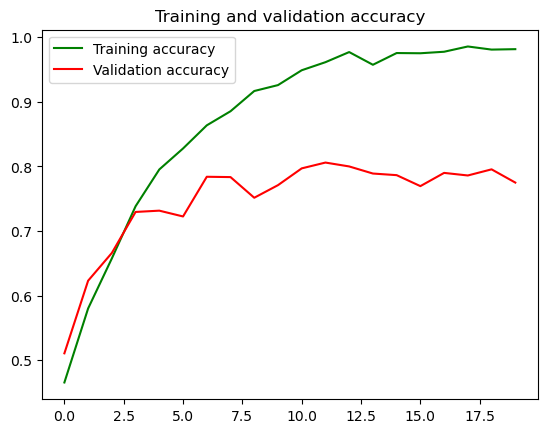

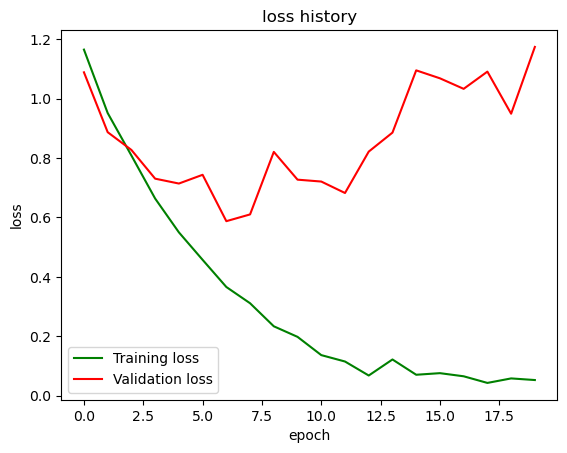

In [13]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_gen,epochs=20,validation_data=val_gen,verbose=1)

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(acc,'g',label='Training accuracy')
plt.plot(val_acc,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss,'g',label='Training loss')
plt.plot(val_loss,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

In [14]:
best_val_epoch = np.argmax(val_acc)
best_train_accuracy = acc[best_val_epoch]
best_val_accuracy = val_acc[best_val_epoch]
print(f"Best Validation Accuracy: {best_val_accuracy}\nCorresponding Training Accuracy: {best_train_accuracy}")

Best Validation Accuracy: 0.8059999942779541
Corresponding Training Accuracy: 0.9614999890327454


## build optimized CNN
> data augmentation - increase the diversity of the data by augmenting to help prevent overfitting and improve generalization 
>> implement batch normalization, regularization, dropout, regularization - stabilization and to help prevent overfitting
>>> early stopping and scheduler - helps with overfitting, reduce runtime and improve convergence, and prevent the model from getting stuck at local minima or saddle points

In [15]:
#apply different params of augmentation
aug_train_datagen=ImageDataGenerator(rotation_range=20,brightness_range=(0.2,1.5),zoom_range=0.1,horizontal_flip=True,vertical_flip=True,rescale=1./255)
aug_train_gen=aug_train_datagen.flow_from_directory(path_train,target_size=(32,32),batch_size=32,seed=42,shuffle=True,class_mode='categorical')

Found 6000 images belonging to 4 classes.


In [16]:
from keras import models, layers, regularizers, callbacks
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

aug_model = models.Sequential()

# init
aug_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
aug_model.add(BatchNormalization())
aug_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
aug_model.add(MaxPooling2D(pool_size=(2, 2)))
aug_model.add(BatchNormalization())
aug_model.add(Dropout(0.2))
# block1
aug_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
aug_model.add(MaxPooling2D(pool_size=(2, 2)))
aug_model.add(BatchNormalization())
aug_model.add(Dropout(0.2))
# block2
aug_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
aug_model.add(MaxPooling2D(pool_size=(2, 2)))
aug_model.add(BatchNormalization())
aug_model.add(Dropout(0.3))
# block3
aug_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
aug_model.add(BatchNormalization())
aug_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
aug_model.add(MaxPooling2D(pool_size=(2, 2)))
aug_model.add(BatchNormalization())
aug_model.add(Dropout(0.4))
# flatten
aug_model.add(Flatten())
# dense
aug_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
aug_model.add(Dropout(0.5))
aug_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
aug_model.add(Dropout(0.5))
aug_model.add(Dense(4, activation='softmax'))

print(aug_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

Epoch 1/40
188/188 [==============================] - 37s 176ms/step - loss: 2.6381 - accuracy: 0.4410 - val_loss: 2.9906 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/40
188/188 [==============================] - 32s 168ms/step - loss: 2.1156 - accuracy: 0.5545 - val_loss: 2.8754 - val_accuracy: 0.3300 - lr: 0.0010
Epoch 3/40
188/188 [==============================] - 31s 163ms/step - loss: 1.8415 - accuracy: 0.6407 - val_loss: 2.2690 - val_accuracy: 0.4330 - lr: 0.0010
Epoch 4/40
188/188 [==============================] - 31s 162ms/step - loss: 1.5626 - accuracy: 0.7253 - val_loss: 1.4203 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 5/40
188/188 [==============================] - 29s 156ms/step - loss: 1.3191 - accuracy: 0.7835 - val_loss: 1.2138 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 6/40
188/188 [==============================] - 31s 165ms/step - loss: 1.1175 - accuracy: 0.8187 - val_loss: 1.3659 - val_accuracy: 0.7110 - lr: 0.0010
Epoch 7/40
188/188 [==============================] 

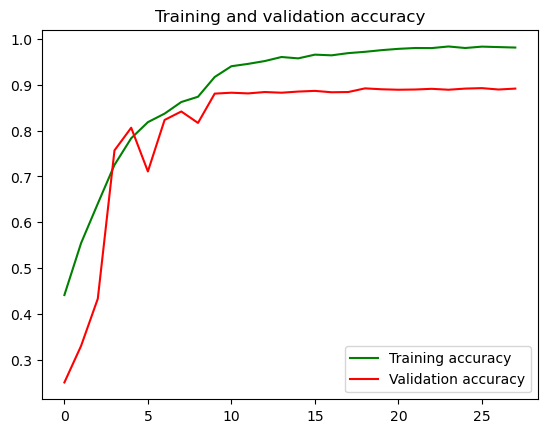

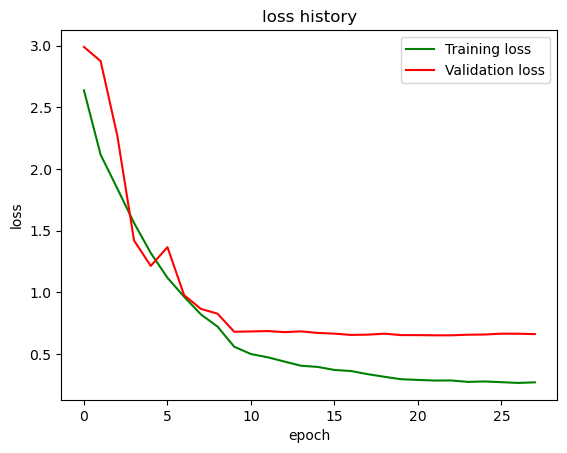

In [17]:
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    decay = 0.1
    epochs_per_decay = 10
    lrate = initial_lr * np.power(decay, np.floor((1+epoch)/epochs_per_decay))
    return lrate
lr_scheduler = LearningRateScheduler(lr_schedule)

optim = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
aug_model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
aug_history=aug_model.fit(train_gen,epochs=40,callbacks=[early_stopping,lr_scheduler],validation_data=val_gen,verbose=1)

aug_acc=aug_history.history['accuracy']
aug_val_acc=aug_history.history['val_accuracy']
aug_loss=aug_history.history['loss']
aug_val_loss=aug_history.history['val_loss']

plt.plot(aug_acc,'g',label='Training accuracy')
plt.plot(aug_val_acc,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(aug_loss,'g',label='Training loss')
plt.plot(aug_val_loss,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

In [18]:
best_val_epoch = np.argmax(aug_val_acc)
best_train_accuracy = aug_acc[best_val_epoch]
best_val_accuracy = aug_val_acc[best_val_epoch]
print(f"Best Validation Accuracy: {best_val_accuracy}\nCorresponding Training Accuracy: {best_train_accuracy}")

Best Validation Accuracy: 0.8930000066757202
Corresponding Training Accuracy: 0.9836666584014893


In [19]:
# after applying augmentation, regularization techniques, and scheduling, it helped with the overfitting and helped to generalize better, though there is still slight overfitting

## make prediction

ship
['0001.png', '0002.png', '0003.png', '0004.png']


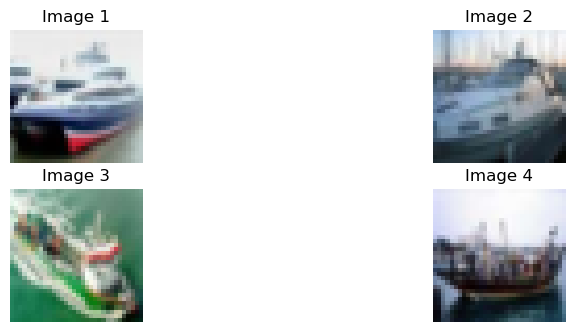

In [20]:
# test on imgs from the test set
test_airplane="testing folder/dataset_transport/test/airplane"
test_automobile="testing folder/dataset_transport/test/automobile"
test_ship="testing folder/dataset_transport/test/ship"
test_truck="testing folder/dataset_transport/test/truck"
files=[]
plt.figure(figsize=(10, 10))
def open4(text,path):
    global filename
    count = 0
    print(text)
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                plt.subplot(5, 2, count + 1)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.title(f"Image {count+1}")
                files.append(filename)
                count += 1
                if count >= 4:
                    break
        else:
            print(f"Skipping file: {filename}, not an image.")
open4("ship",test_ship)
print(files)
plt.show()

In [21]:
import PIL.Image as ii
count=0
path_list=[test_airplane,test_automobile,test_ship,test_truck]
img_list=[]
numcount=500
# append all 500 imgs into the list for prediction
for filename in os.listdir(test_airplane):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(test_airplane, filename)
            img_list.append(image_path)
            if image is not None:
                count += 1
                if count >= numcount:
                    count=0
                    break
for filename in os.listdir(test_automobile):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(test_automobile, filename)
            img_list.append(image_path)
            if image is not None:
                count += 1
                if count >= numcount:
                    count=0
                    break
for filename in os.listdir(test_ship):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(test_ship, filename)
            img_list.append(image_path)
            if image is not None:
                count += 1
                if count >= numcount:
                    count=0
                    break
for filename in os.listdir(test_truck):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(test_truck, filename)
            img_list.append(image_path)
            if image is not None:
                count += 1
                if count >= numcount:
                    count=0
                    break

### reference model predictions

In [22]:
# make predictions based on training dataset
count=0
predictions=[]
for i in range(len(img_list)):
    img=ii.open(img_list[i]).resize((32,32))
    img=np.array(img)/255.0
    img=np.expand_dims(img, axis=0)
    result=model.predict(img, verbose=0)
    predicted=np.argmax(result[0],axis=-1)
    predictions.append(predicted)

pred_air,pred_auto,pred_ship,pred_truck=[predictions[i:i+numcount] for i in range(0, len(predictions), numcount)]
print(f"airplane class prediction:\naccuracy = {(1-sum(1 for x in pred_air if x != 0)/numcount)*100}\nautomobile class prediction:\naccuracy = {(1-sum(1 for x in pred_auto if x != 1)/numcount)*100}\nship class prediction:\naccuracy = {(1-sum(1 for x in pred_ship if x != 2)/numcount)*100}\ntruck class prediction:\naccuracy = {(1-sum(1 for x in pred_truck if x != 3)/numcount)*100}")

airplane class prediction:
accuracy = 86.2
automobile class prediction:
accuracy = 85.39999999999999
ship class prediction:
accuracy = 67.39999999999999
truck class prediction:
accuracy = 77.60000000000001


### optimized model predictions

In [23]:
count=0
predictions=[]
for i in range(len(img_list)):
    img=ii.open(img_list[i]).resize((32,32))
    img=np.array(img)/255.0
    img=np.expand_dims(img, axis=0)
    result=aug_model.predict(img, verbose=0)
    predicted=np.argmax(result[0],axis=-1)
    predictions.append(predicted)

In [24]:
pred_air,pred_auto,pred_ship,pred_truck=[predictions[i:i+numcount] for i in range(0, len(predictions), numcount)]
print(f"airplane class prediction:\naccuracy = {(1-sum(1 for x in pred_air if x != 0)/numcount)*100}\nautomobile class prediction:\naccuracy = {(1-sum(1 for x in pred_auto if x != 1)/numcount)*100}\nship class prediction:\naccuracy = {(1-sum(1 for x in pred_ship if x != 2)/numcount)*100}\ntruck class prediction:\naccuracy = {(1-sum(1 for x in pred_truck if x != 3)/numcount)*100}")

airplane class prediction:
accuracy = 86.4
automobile class prediction:
accuracy = 91.0
ship class prediction:
accuracy = 92.4
truck class prediction:
accuracy = 87.8


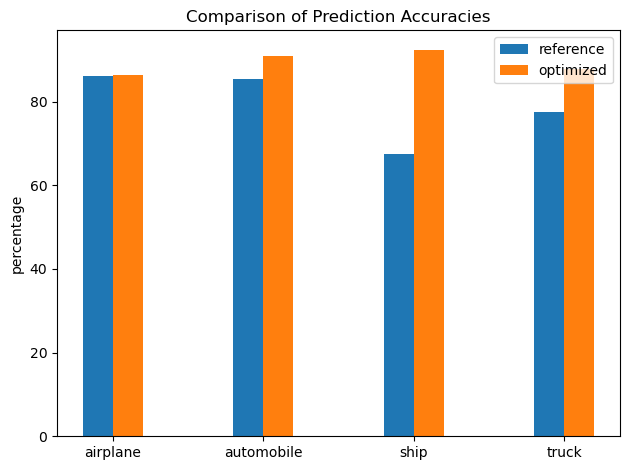

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['airplane', 'automobile', 'ship', 'truck']
values1 = [86.2,85.399,67.399,77.6]
values2 = [86.4,91,92.4,87.8]

# Define the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the first set of bars
bars1 = ax.bar(x - bar_width/2, values1, bar_width, label='Group 1')

# Plot the second set of bars
bars2 = ax.bar(x + bar_width/2, values2, bar_width, label='Group 2')

# Add labels, title, and legend
ax.set_ylabel('percentage')
ax.set_title('Comparison of Prediction Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(["reference","optimized"])

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# can be seen that the predictions for optimized are better than the reference model except for airplane where it is about the same

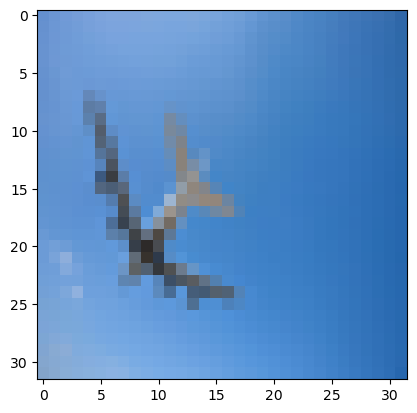

reference model predicted class: 0
optimized model predicted class: 0


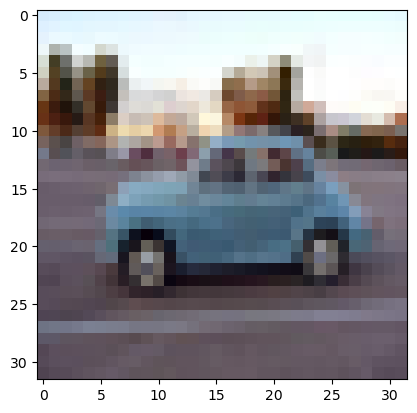

reference model predicted class: 1
optimized model predicted class: 1


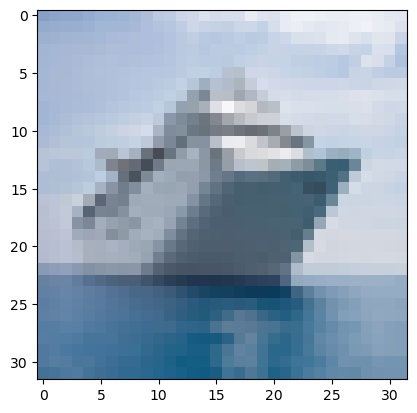

reference model predicted class: 2
optimized model predicted class: 2


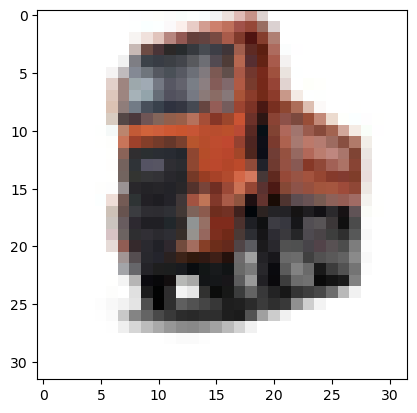

reference model predicted class: 3
optimized model predicted class: 3


In [38]:
airplaneimg="data/plane-data-BUSYROUTES1217-f4f84b08d47f4951b11c148cee2c3dea.jpg";img=ii.open(airplaneimg).resize((32,32))
plt.imshow(img)
plt.show()
#reference model
img=np.array(img)/255.0;img=np.expand_dims(img, axis=0);result=model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"reference model predicted class: {predicted}")
#optimized model
result=aug_model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"optimized model predicted class: {predicted}")
autoimg="data/automobile.jpg";img=ii.open(autoimg).resize((32,32))
plt.imshow(img)
plt.show()
#reference model
img=np.array(img)/255.0;img=np.expand_dims(img, axis=0);result=model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"reference model predicted class: {predicted}")
#optimized model
result=aug_model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"optimized model predicted class: {predicted}")
shipimg="data/ship.jpg";img=ii.open(shipimg).resize((32,32)).transpose(ii.FLIP_LEFT_RIGHT)
plt.imshow(img)
plt.show()
#reference model
img=np.array(img)/255.0;img=np.expand_dims(img, axis=0);result=model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"reference model predicted class: {predicted}")
#optimized model
result=aug_model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"optimized model predicted class: {predicted}")
img="data/truck.jpg";img=ii.open(img).resize((32,32))
plt.imshow(img)
plt.show()
#reference model
img=np.array(img)/255.0;img=np.expand_dims(img, axis=0);result=model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"reference model predicted class: {predicted}")
#optimized model
result=aug_model.predict(img, verbose=0);predicted=np.argmax(result[0],axis=-1)
print(f"optimized model predicted class: {predicted}")

# transfer learning

## build reference transfer learning model with vgg16

In [28]:
#using VGG16, has 16 layers - 13 convolutional and 3 fully connected layers
#often used as feature extractors or finetuned

In [29]:
# using the augmented data to train the transfer learning model
aug_train_datagen=ImageDataGenerator(rotation_range=20,brightness_range=(0.2,1.5),zoom_range=0.1,horizontal_flip=True,vertical_flip=True,rescale=1./255)
aug_train_gen=aug_train_datagen.flow_from_directory(path_train,target_size=(32,32),batch_size=32,seed=42,shuffle=True,class_mode='categorical')

Found 6000 images belonging to 4 classes.


In [78]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

from keras.applications.vgg16 import VGG16

base_model.trainable = False

base_model = VGG16(weights='imagenet',include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
prediction = Dense(4, activation='softmax')(x)

transfermodel = Model(inputs=base_model.input, outputs=prediction,name="vgg16")
transfermodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [79]:
#Define freeze and unfrozen layers
for layer in transfermodel.layers[:20]:
  layer.trainable=False

for layer in transfermodel.layers[20:]:
  layer.trainable=True

In [80]:
transfermodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transferhistory = transfermodel.fit(aug_train_gen,epochs=20,validation_data=val_gen)

Epoch 1/20
188/188 [==============================] - 30s 157ms/step - loss: 1.1108 - accuracy: 0.5030 - val_loss: 0.9174 - val_accuracy: 0.6170
Epoch 2/20
188/188 [==============================] - 31s 162ms/step - loss: 0.9889 - accuracy: 0.5683 - val_loss: 0.8865 - val_accuracy: 0.6245
Epoch 3/20
188/188 [==============================] - 30s 162ms/step - loss: 0.9510 - accuracy: 0.5953 - val_loss: 0.8589 - val_accuracy: 0.6475
Epoch 4/20
188/188 [==============================] - 33s 178ms/step - loss: 0.9269 - accuracy: 0.6023 - val_loss: 0.8628 - val_accuracy: 0.6410
Epoch 5/20
188/188 [==============================] - 33s 178ms/step - loss: 0.9098 - accuracy: 0.6110 - val_loss: 0.8609 - val_accuracy: 0.6560
Epoch 6/20
188/188 [==============================] - 31s 167ms/step - loss: 0.8982 - accuracy: 0.6148 - val_loss: 0.8430 - val_accuracy: 0.6510
Epoch 7/20
188/188 [==============================] - 33s 175ms/step - loss: 0.8876 - accuracy: 0.6202 - val_loss: 0.8338 - val_ac

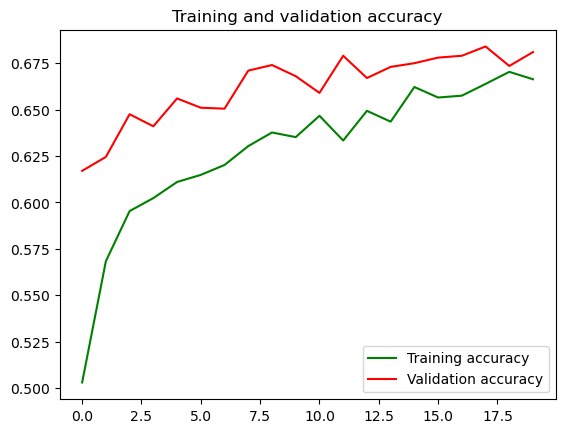

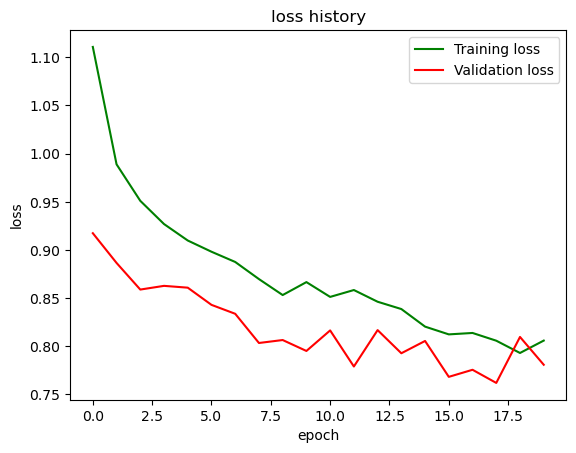

In [81]:
transferacc=transferhistory.history['accuracy']
transferval_acc=transferhistory.history['val_accuracy']
transferloss=transferhistory.history['loss']
transferval_loss=transferhistory.history['val_loss']

plt.plot(transferacc,'g',label='Training accuracy')
plt.plot(transferval_acc,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(transferloss,'g',label='Training loss')
plt.plot(transferval_loss,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

In [82]:
best_val_epoch = np.argmax(transferval_acc)
best_train_accuracy = transferacc[best_val_epoch]
best_val_accuracy = transferval_acc[best_val_epoch]
print(f"Best Validation Accuracy: {best_val_accuracy}\nCorresponding Training Accuracy: {best_train_accuracy}")

Best Validation Accuracy: 0.6840000152587891
Corresponding Training Accuracy: 0.6638333201408386


In [83]:
results = transfermodel.evaluate(val_gen)
print('val loss:', results[0])
print('val acc:', results[1])

63/63 [==============================] - 8s 127ms/step - loss: 0.7809 - accuracy: 0.6810
val loss: 0.7808685898780823
val acc: 0.6809999942779541


In [43]:
#can be seen that it is heavily overfit from the graph, the accuracy is good but the validation accuracy is stuck at ~70 which is not ideal

## optimizing

In [170]:
model2 = VGG16(weights='imagenet',include_top=False, input_shape=(32, 32, 3))

model2.trainable = False

x = model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
prediction = Dense(4, activation='softmax')(x)

trnf_ft = Model(inputs=model2.input, outputs=prediction,name="vgg16")

In [171]:
for i, layer in enumerate(trnf_ft.layers):
    print(i, layer.name, layer.trainable)

0 input_37 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 global_average_pooling2d_38 True
20 dense_67 True
21 dropout_31 True
22 dense_68 True


In [172]:
from keras.callbacks import ReduceLROnPlateau
optim1 = Adam(lr=0.0001)
trnf_ft.compile(optimizer=optim1, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
transferhistory2 = trnf_ft.fit(aug_train_gen,epochs=100,validation_data=val_gen,callbacks=[earlystopping,reduce_lr])

Epoch 1/100
188/188 [==============================] - 29s 153ms/step - loss: 1.1705 - accuracy: 0.4728 - val_loss: 1.0304 - val_accuracy: 0.5650 - lr: 0.0010
Epoch 2/100
188/188 [==============================] - 30s 160ms/step - loss: 1.0534 - accuracy: 0.5420 - val_loss: 0.9731 - val_accuracy: 0.5865 - lr: 0.0010
Epoch 3/100
188/188 [==============================] - 29s 157ms/step - loss: 1.0193 - accuracy: 0.5502 - val_loss: 0.8941 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 4/100
188/188 [==============================] - 31s 163ms/step - loss: 0.9974 - accuracy: 0.5682 - val_loss: 0.9034 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 5/100
188/188 [==============================] - 30s 159ms/step - loss: 0.9881 - accuracy: 0.5780 - val_loss: 0.9307 - val_accuracy: 0.6160 - lr: 0.0010
Epoch 6/100
188/188 [==============================] - 33s 174ms/step - loss: 0.9838 - accuracy: 0.5763 - val_loss: 0.8952 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 7/100
188/188 [=========================

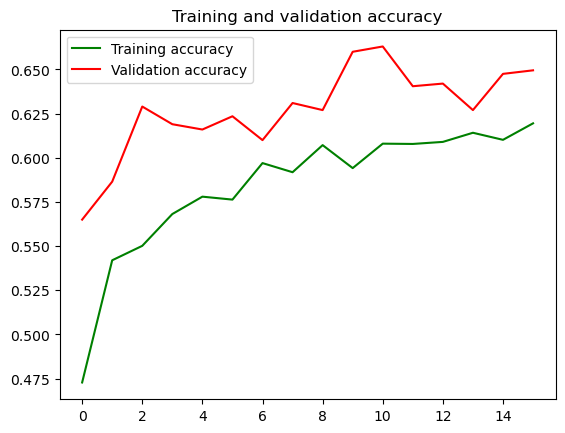

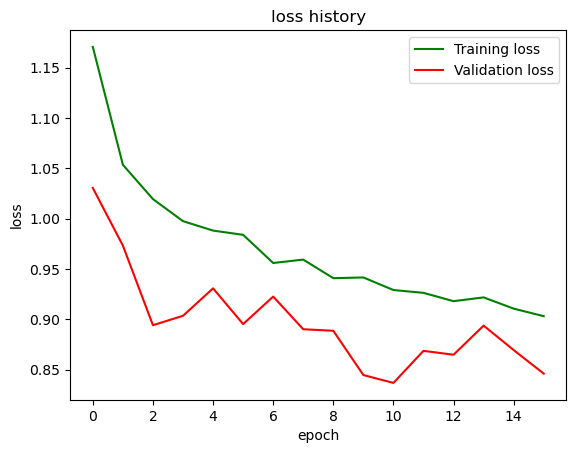

In [173]:
transferacc2=transferhistory2.history['accuracy']
transferval_acc2=transferhistory2.history['val_accuracy']
transferloss2=transferhistory2.history['loss']
transferval_loss2=transferhistory2.history['val_loss']

plt.plot(transferacc2,'g',label='Training accuracy')
plt.plot(transferval_acc2,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(transferloss2,'g',label='Training loss')
plt.plot(transferval_loss2,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

In [174]:
best_val_epoch = np.argmax(transferval_acc2)
best_train_accuracy = transferacc2[best_val_epoch]
best_val_accuracy = transferval_acc2[best_val_epoch]
print(f"Best Validation Accuracy: {best_val_accuracy}\nCorresponding Training Accuracy: {best_train_accuracy}")

Best Validation Accuracy: 0.6629999876022339
Corresponding Training Accuracy: 0.6079999804496765


### fine tuning

In [175]:
model2.trainable = True
for layer in model2.layers[:15]:
    layer.trainable=False
for layer in model2.layers[15:]:
    layer.trainable=True
optim1 = Adam(lr=0.01)
trnf_ft.compile(optimizer=optim1, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
transferhistory2 = trnf_ft.fit(aug_train_gen,epochs=100,validation_data=val_gen,callbacks=[earlystopping,reduce_lr])

Epoch 1/100
188/188 [==============================] - 81s 424ms/step - loss: 1.3885 - accuracy: 0.3670 - val_loss: 1.2087 - val_accuracy: 0.4355 - lr: 0.0010
Epoch 2/100
188/188 [==============================] - 79s 420ms/step - loss: 1.1087 - accuracy: 0.4402 - val_loss: 1.0156 - val_accuracy: 0.5025 - lr: 0.0010
Epoch 3/100
188/188 [==============================] - 81s 431ms/step - loss: 1.0138 - accuracy: 0.5145 - val_loss: 1.2728 - val_accuracy: 0.5890 - lr: 0.0010
Epoch 4/100
188/188 [==============================] - 83s 440ms/step - loss: 0.9405 - accuracy: 0.6117 - val_loss: 0.8268 - val_accuracy: 0.6565 - lr: 0.0010
Epoch 5/100
188/188 [==============================] - 81s 430ms/step - loss: 0.8499 - accuracy: 0.6703 - val_loss: 0.7993 - val_accuracy: 0.6960 - lr: 0.0010
Epoch 6/100
188/188 [==============================] - 80s 428ms/step - loss: 0.8024 - accuracy: 0.6857 - val_loss: 1.0081 - val_accuracy: 0.6715 - lr: 0.0010
Epoch 7/100
188/188 [=========================

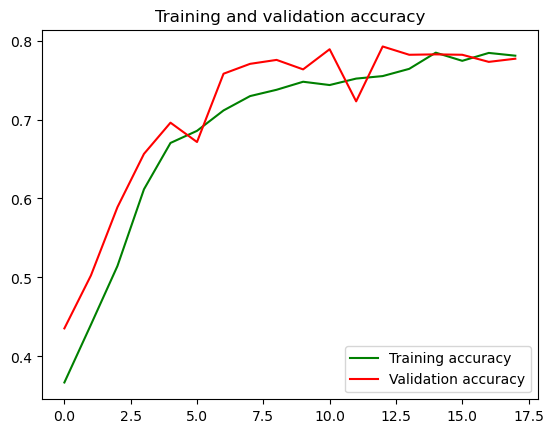

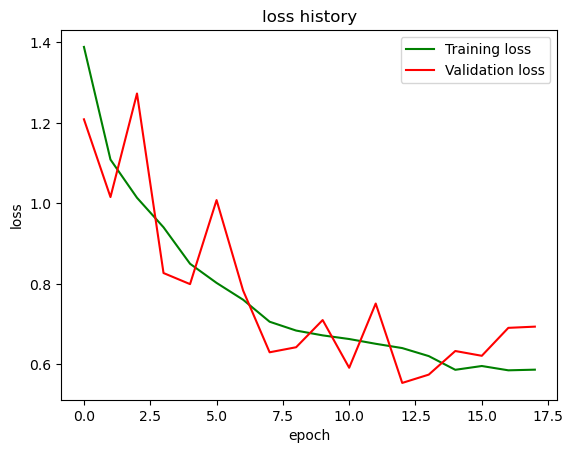

In [176]:
transferacc2=transferhistory2.history['accuracy']
transferval_acc2=transferhistory2.history['val_accuracy']
transferloss2=transferhistory2.history['loss']
transferval_loss2=transferhistory2.history['val_loss']

plt.plot(transferacc2,'g',label='Training accuracy')
plt.plot(transferval_acc2,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(transferloss2,'g',label='Training loss')
plt.plot(transferval_loss2,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

In [177]:
best_val_epoch = np.argmax(transferval_acc2)
best_train_accuracy = transferacc2[best_val_epoch]
best_val_accuracy = transferval_acc2[best_val_epoch]
print(f"Best Validation Accuracy: {best_val_accuracy}\nCorresponding Training Accuracy: {best_train_accuracy}")

Best Validation Accuracy: 0.7925000190734863
Corresponding Training Accuracy: 0.7549999952316284


In [189]:
# further finetuning by unfreezing and training again

In [185]:
model2.trainable = True
for layer in model2.layers[:20]:
    layer.trainable=False
for layer in model2.layers[20:]:
    layer.trainable=True
optim1 = Adam(lr=0.01)
trnf_ft.compile(optimizer=optim1, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
transferhistory2 = trnf_ft.fit(aug_train_gen,epochs=100,validation_data=val_gen,callbacks=[earlystopping,reduce_lr])

Epoch 1/100
188/188 [==============================] - 31s 163ms/step - loss: 0.5566 - accuracy: 0.7950 - val_loss: 0.7649 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 2/100
188/188 [==============================] - 34s 182ms/step - loss: 0.5476 - accuracy: 0.7933 - val_loss: 0.7514 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 3/100
188/188 [==============================] - 35s 184ms/step - loss: 0.5381 - accuracy: 0.7972 - val_loss: 0.7508 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 4/100
188/188 [==============================] - 35s 188ms/step - loss: 0.5467 - accuracy: 0.7897 - val_loss: 0.7038 - val_accuracy: 0.7840 - lr: 0.0010
Epoch 5/100
188/188 [==============================] - 35s 184ms/step - loss: 0.5349 - accuracy: 0.7957 - val_loss: 0.7502 - val_accuracy: 0.7725 - lr: 0.0010
Epoch 6/100
188/188 [==============================] - 35s 185ms/step - loss: 0.5415 - accuracy: 0.7962 - val_loss: 0.7020 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 7/100
188/188 [=========================

In [192]:
# the train acc and val accuracies were improved to train 79 and val 77

## prediction with transfer learning models

### prediction with reference transfer learning model

In [190]:
count=0
predictions=[]
for i in range(len(img_list)):
    img=ii.open(img_list[i]).resize((32,32))
    img=np.array(img)/255.0
    img=np.expand_dims(img, axis=0)
    result=transfermodel.predict(img, verbose=0)
    predicted=np.argmax(result[0],axis=-1)
    predictions.append(predicted)

In [191]:
pred_air,pred_auto,pred_ship,pred_truck=[predictions[i:i+numcount] for i in range(0, len(predictions), numcount)]
print(f"airplane class prediction:\naccuracy = {(1-sum(1 for x in pred_air if x != 0)/numcount)*100}\nautomobile class prediction:\naccuracy = {(1-sum(1 for x in pred_auto if x != 1)/numcount)*100}\nship class prediction:\naccuracy = {(1-sum(1 for x in pred_ship if x != 2)/numcount)*100}\ntruck class prediction:\naccuracy = {(1-sum(1 for x in pred_truck if x != 3)/numcount)*100}")

airplane class prediction:
accuracy = 69.39999999999999
automobile class prediction:
accuracy = 80.60000000000001
ship class prediction:
accuracy = 74.2
truck class prediction:
accuracy = 60.0


### prediction with finetuned transfer learning model

In [178]:
count=0
predictions=[]
for i in range(len(img_list)):
    img=ii.open(img_list[i]).resize((32,32))
    img=np.array(img)/255.0
    img=np.expand_dims(img, axis=0)
    result=trnf_ft.predict(img, verbose=0)
    predicted=np.argmax(result[0],axis=-1)
    predictions.append(predicted)

In [179]:
pred_air,pred_auto,pred_ship,pred_truck=[predictions[i:i+numcount] for i in range(0, len(predictions), numcount)]
print(f"airplane class prediction:\naccuracy = {(1-sum(1 for x in pred_air if x != 0)/numcount)*100}\nautomobile class prediction:\naccuracy = {(1-sum(1 for x in pred_auto if x != 1)/numcount)*100}\nship class prediction:\naccuracy = {(1-sum(1 for x in pred_ship if x != 2)/numcount)*100}\ntruck class prediction:\naccuracy = {(1-sum(1 for x in pred_truck if x != 3)/numcount)*100}")

airplane class prediction:
accuracy = 75.8
automobile class prediction:
accuracy = 88.4
ship class prediction:
accuracy = 74.8
truck class prediction:
accuracy = 79.2


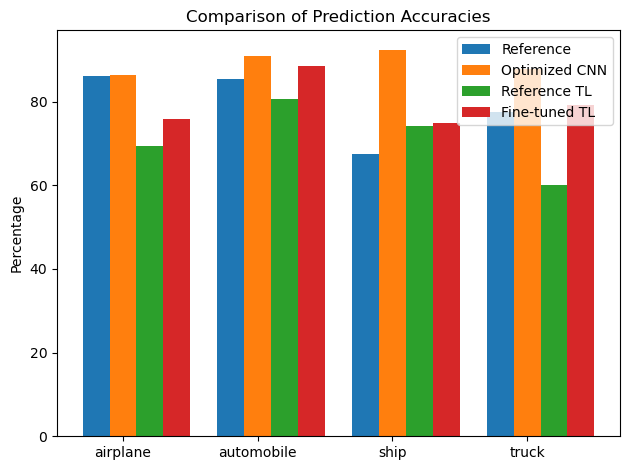

In [196]:
categories = ['airplane', 'automobile', 'ship', 'truck']
values1 = [86.2, 85.399, 67.399, 77.6]
values2 = [86.4, 91, 92.4, 87.8]
values3 = [69.39, 80.6, 74.2, 60]  # Reference TL
values4 = [75.8, 88.4, 74.8, 79.2]  # Fine-tuned TL

bar_width = 0.2
x = np.arange(len(categories))

fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width, values1, bar_width, label='Reference')
bars2 = ax.bar(x, values2, bar_width, label='Optimized CNN')
bars3 = ax.bar(x + bar_width, values3, bar_width, label='Reference TL')
bars4 = ax.bar(x + 2 * bar_width, values4, bar_width, label='Fine-tuned TL')

ax.set_ylabel('Percentage')
ax.set_title('Comparison of Prediction Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [197]:
# the reference transfer learning model performs the worst in comparison
# can be seen that the finetuned transfer learning model performs slightly better than the reference CNN model, however does not perform as well as the optimized CNN model

### transfer learning with mobilenet

In [102]:
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Load MobileNet model without top classification layers
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [103]:
input_shape = (32, 32, 3)

# Create a new input layer with the adjusted shape
new_input = Input(shape=input_shape)

# Pass the new input through the base model
x = mobilenet(new_input)

In [104]:
x = GlobalAveragePooling2D()(mobilenet.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
mobilenet = Model(inputs=mobilenet.input, outputs=predictions)

In [105]:
for layer in mobilenet.layers:
    layer.trainable = False

In [107]:
optim1 = Adam(lr=0.0001)
mobilenet.compile(optimizer=optim1, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
transferhistory3 = mobilenet.fit(aug_train_gen,epochs=10,validation_data=val_gen,callbacks=[earlystopping,reduce_lr])

Epoch 1/10
188/188 [==============================] - 12s 59ms/step - loss: 1.3883 - accuracy: 0.2615 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 2/10
188/188 [==============================] - 10s 53ms/step - loss: 1.3889 - accuracy: 0.2560 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 3/10
188/188 [==============================] - 11s 59ms/step - loss: 1.3888 - accuracy: 0.2628 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 4/10
188/188 [==============================] - 12s 61ms/step - loss: 1.3889 - accuracy: 0.2575 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 5/10
188/188 [==============================] - 11s 56ms/step - loss: 1.3892 - accuracy: 0.2563 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 6/10
188/188 [==============================] - 11s 59ms/step - loss: 1.3896 - accuracy: 0.2528 - val_loss: 1.3897 - val_accuracy: 0.2535 - lr: 0.0010
Epoch 7/10
188/188 [==============================] - 12s 

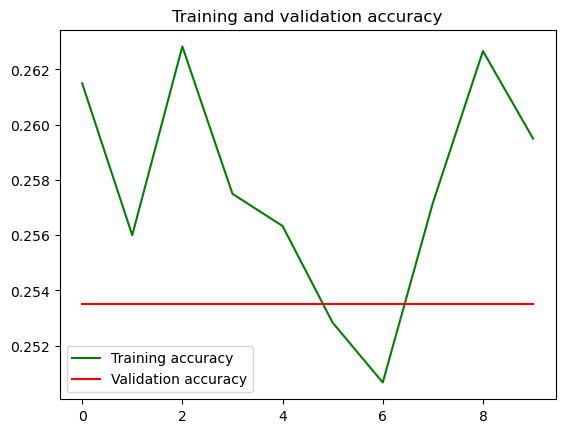

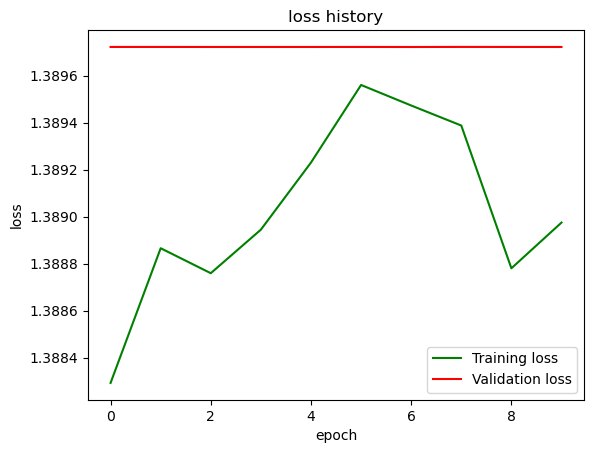

In [132]:
transferacc3=transferhistory3.history['accuracy']
transferval_acc3=transferhistory3.history['val_accuracy']
transferloss3=transferhistory3.history['loss']
transferval_loss3=transferhistory3.history['val_loss']

plt.plot(transferacc3,'g',label='Training accuracy')
plt.plot(transferval_acc3,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(transferloss3,'g',label='Training loss')
plt.plot(transferval_loss3,'r',label='Validation loss')
plt.title('loss history')
plt.ylabel("loss");plt.xlabel("epoch")
plt.legend()
plt.show()

# summary

### 1
Summary of CNN model development (<150 words): to describe your key considerations on design strategy, overfitting techniques, evaluation & optimization, etc

Key considerations on design strategy
> Main considerations were like the shape of the accuracy and loss graphs - is it overfitting? Ensuring the curve has no sudden spikes or plateaus, tradeoff between train and val accuracy, and performance of the model on predictions

(37words)

Overfitting techniques
> Because the model was overfitting very badly initially - the loss graph was a curve and train and val accuracy were far apart, signifying the model is not generalising well on new data. To combat this, used data augmentation to diversify and increase the patterns to the training data, L2 regularization to introduce penalties, early stopping to monitor the validation loss, dropout, and batch normalization.

(64 words)

Optimization
>Introduced more layers to help the model extract higher-level features, introduced LR scheduler to help adjust the learning rate to find the optimal value, tuned the parameters according to the model. Tried different optimizers like rmsprop and AdamW, chose Adam.

(40words)

### 2
Summary of Transfer Learning model development (<150 words): to describe your key considerations on pre-trained model selection, tuning strategies, overfitting techniques, evaluation & optimization, etc.

Key considerations on pre-trained model selection
>Choosing the a transfer learning model that can support small datasets and generalizes well on small data. Number of layers because a model too complex can cause more overfitting. If requires too much computational resources, it'll take too long to run

(41words)

Optimization
>Applied LR scheduler to help with model convergence, gradually unfreezing the layers to finetune to allow for better generalization, choosing different models to decide which one provides the best results, tuning hyperparameters like learning rate and batch size, and applied early stopping.

(42words)

Overfitting techniques
>Implemented data augmentation, dropout rates to help with overfitting

(9words)

Tuning strategies
>Tuning params like dense layers, experimenting with different learning rates, freezing and unfreezing different number of layers, experimenting with different dropout rates, and augmenting data with different params.

(28words)

>Tried with MobileNetV2, not give very good results though it is an enhanced version of MobileNet.

(16words)

## 3
Comparison of the 2 models (CNN and Transfer Learning) (<150 words): to compare and explain their results and performance, pros/cons, suitability for the given task, etc

Comparison of the 2 models
>CNN did better with better tradeoff between training and val accuracy, and higher training and val accuracy. Transfer learning across MobileNet and VGG16 did not perform well.

(27words)

Explain results and performance
>CNN performed better, also took lesser time to run the model. Transfer learning is suppose to perform better because of its ability to generalize with smaller dataset (only 6k training imgs). CNN could be better because of the tuning of parameters, that the transfer learning was not configured to this specific task, which resulted in the low accuracy

(58words)

CNN
>Pros - learn from raw pixel data, ability to generalize on unseen data


>Cons - requires large amounts of data, overfitting

Transfer learning
>Pros - enables effective learning from smaller dataset, faster training




>Cons - limited adaptability, model bias from pretrain

(31words)

Suitability of given task
>Transfer learning would be better for a small dataset, with faster convergence during training and requires less labelled data to achieve good performance on a new task, moreover with pretrained weights; faster and lesser computational resources, however there may be bias.

(41words)